# Linear Regression Lab

This workbook is to accompany the PDF on Moodle. I will go through a simple linear regression example, then ask you to build multiple different ones. I will build the model by referring to the PDF

step 1, import the things we probably always want

In [18]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


These ones are not for always, but I like this plotting style for this workbook

In [19]:
import matplotlib
matplotlib.style.use('ggplot')

Let's take this set

X has values 5,7,9,11,13,15
y has 11,14,20,24,29,31

and we want to build a model
$\hat{y} = w_0 + w_1x$

In [20]:
X = np.array([5, 7, 9, 11, 13, 15])
y = np.array([11, 14, 20, 24, 29, 31])

Let's plot it to see if a linear model makes sense for this

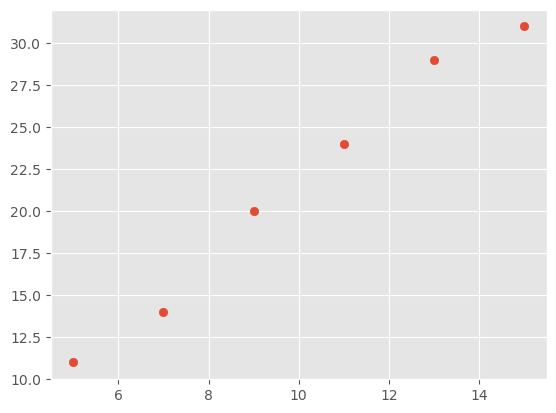

In [21]:
plt.scatter(X,y)
plt.show()

We can check the correlation coefficient (if you don't know what this, don't worry about it

In [22]:
np.corrcoef(X, y)

array([[1.        , 0.99322298],
       [0.99322298, 1.        ]])

0.99322, very high correlation!

## Referring to section 2 Data Structure of the PDF let's look at X and y in more detail

In [23]:
y.shape

(6,)

In [24]:
y.ndim

1

y is clearly a 1d array, as expected - good

In [25]:
X.shape

(6,)

In [26]:
X.ndim

1

X is also a 1d array, not good. It needs to be a 2d array

In [27]:
X

array([ 5,  7,  9, 11, 13, 15])

It's written as one row, but really we need 6 rows with one entry in each row. Let's reshape the array

In [28]:
X = X.reshape(-1,1) # Linear regression in scikit-learn expects X to be a 2D array.

In [29]:
X.shape # Now X has shape (6, 1), meaning 6 rows and 1 column — perfect for fitting.

(6, 1)

In [30]:
X.ndim

2

2d array. Good. Let's look at it

In [31]:
X

array([[ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15]])

6 rows now

## Section 3, build the model

In [32]:
from sklearn.linear_model import LinearRegression

# This creates and fits a linear regression model to data.

In [33]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    tol=1e-06,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

tol : float, default=1e-6
    The precision of the solution (`coef_`) is determined by `tol` which
    specifies a different convergence criterion for the `lsqr` solver.
    `tol` is set as `atol` and `btol` of `scipy.sparse.linalg.lsqr` when
    fitting on sparse training data. Th

Create the model, with sklearn you initialise the model with an "empty constructor" of the base form of the model. LinearRegression is the constructor

In [34]:
model = LinearRegression() # This sets up an empty model that’s ready to learn.

Now "fit" the model using x and y. Use an appropriate ? after method name to see. .fit expects the X part to be a matrix, but we have a 1 dimensional array. Pay attention to the error message when you just do x,y

This tells the model to find the best line that fits your data. It calculates the slope (coef_) and intercept (intercept_) so it can make predictions.

In [35]:
model.fit(X,y) # After .fit(), the model now knows 
# model.coef_ → the slope
# model.intercept_ → the intercept
# model.predict() → how to make predictions
# model.score() → how good the line is

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Section 4 Inferences

In [36]:
model.coef_

array([2.12857143])

In [37]:
model.intercept_

np.float64(0.2142857142857153)

There are the parameters

$\hat{y} = 0.2142857142857153 + 2.12857143 x$

is the model *(This is the equation model will use to make predictions.)

In [38]:
w0 = model.intercept_
w1 = model.coef_[0]

In [39]:
predictions = w0 + np.dot(w1,X).reshape(1,-1)

In [40]:
predictions

array([[10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
        32.14285714]])

Using the built in .predict

In [41]:
pred = model.predict(X)

In [42]:
pred

array([10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
       32.14285714])

In [43]:
pred == predictions

array([[ True,  True,  True,  True,  True,  True]])

They're the same.
* Manual method: helps you understand the math behind the model.
* predict() method: faster, cleaner, and preferred in real-world use.

## Section 5 Evaluation

In this section, we are using the same data we trained the model on to also evaluate it. (which is all about checking how well linear regression model performs)

When you fit a linear model and then compute quantities on the same data, you are answering questions of the form: "Given this dataset, how well does this model explain the observed variation?"

From a statistical perspective, this is entirely legitimate. However, we are doing a module on Machine Learning so the scores are very optimistic and should not really be used to make machine learning decisions.

PDF Section 5 should be read with this workbook

In [44]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [45]:
mse(y,pred) # mean squared error

0.723809523809522

Measures the average squared difference between actual and predicted values.
Smaller is better.
Here, model’s predictions are very close to the actual values.

In [46]:
r2(y,pred) # (Coefficient of Determination)

0.9864918906909576

Very close to 1!

Root Mean Squared Error

Measures how well the model explains the variance in the data.
Ranges from 0 to 1.
0.9865 means your model explains 98.65% of the variation — excellent fit!

In [47]:
rmse = np.sqrt(mse(y,pred)) # Just the square root of MSE.
# Easier to interpret because it's in the same units as your target variable (car value).
# Tells: “On average, predictions are off by about €0.85.”

In [48]:
rmse

np.float64(0.8507699593953244)

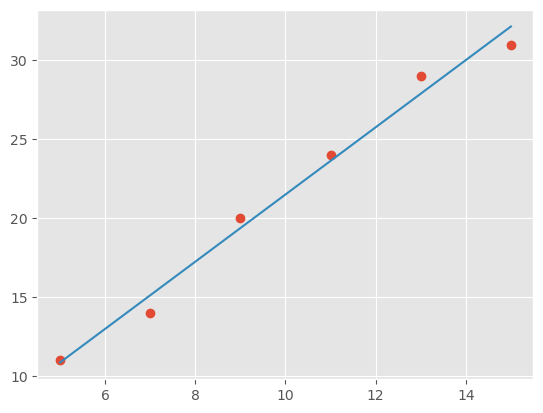

In [49]:
plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()
# This plot shows the line of best fit going through your data points. It visually confirms that your model is doing a great job.

shows the line of best fit

In [50]:
model.score(X,y)

0.9864918906909576

Agrees with the r2 from above

# Work for you now

We assume that the value of cars goes down with age, can we make a model that will predict the value of a particular type of car, just by looking at its age

This is a collection of data for a particular make and model of car. The person collecting the data recorded the age of a car and its value. 

You should notice there are cars that are 5 years of age yet have different values, this is because there is variance that our model is not capturing but maybe it can show some interesting things

In [51]:
# 1. Data
X=np.array([5,4,6,5,5,5,6,6,2,7,7])
y=np.array([85,103,70,82,89,98,66,95,169,70,48])

# Reshape X to 2D 
X = X.reshape(-1, 1)

Go build and evaluate a model for this

In [52]:
# 2. Build and fit the model 
model = LinearRegression() 
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
# 3. Extract parameters 
w0 = model.intercept_ 
w1 = model.coef_[0] 
print("Intercept (w0):", w0) 
print("Slope (w1):", w1)

Intercept (w0): 195.46846846846847
Slope (w1): -20.261261261261264


In [54]:
# 4. Predictions  
pred = model.predict(X)

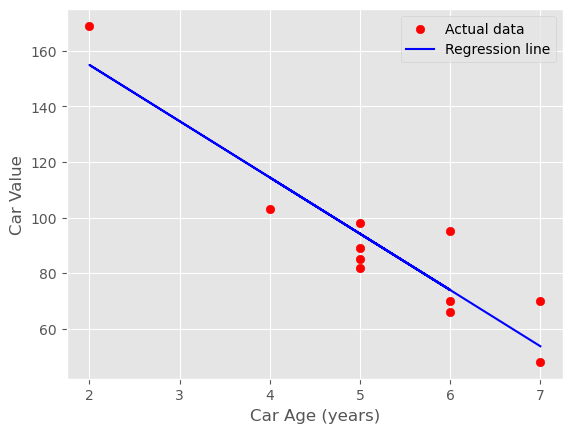

In [55]:
# 5. Plot data + regression line  
plt.scatter(X, y, color='red', label='Actual data') 
plt.plot(X, pred, color='blue', label='Regression line') 
plt.xlabel("Car Age (years)") 
plt.ylabel("Car Value") 
plt.legend() 
plt.show()

In [56]:
# Evaluation

In [57]:
mse(y, pred)

129.41195741195742

In [58]:
r2(y,pred)

0.8533733463785714

In [59]:
rmse = np.sqrt(mse(y,pred)) # Just the square root of MSE.

In [60]:
rmse

np.float64(11.3759376497921)

What above does:
* Loads your car‑age and car‑value data
* Reshapes X so scikit‑learn can use it
* Fits a linear regression model
* Prints the learned slope and intercept
* Plots the line of best fit
* Calculates MSE, RMSE, and R²

## Section 6 Model Selection

* Model selection using validation, which is a critical step in building reliable machine learning models. 

Section 6 of PDF is this. It follows on from Monday's lecture.

We are going to first of all generate a new dataset that has 3 features $x_1$, $x_2$ and $x_3$

Then we are going to evaluate multiple models and choose the "best" one, select a model to use

* Trying out different models to see which one performs best. Each model uses different combinations of features (x₁, x₂, x₃) to predict the target y.
* The goal is to compare their performance and choose the one that generalizes best — not just fits the training data.

In [61]:
## This generates some X and y for us to use
np.random.seed(0)
n = 500
x1 = np.random.normal(size=n)          # strong predictor
x2 = np.random.normal(size=n) * 0.5    # weak predictor
x3 = np.random.normal(size=n)          # noise
y = 3*x1 + 0.5*x2 + np.random.normal(scale=0.5, size=n)

X = np.column_stack([x1, x2, x3])


### Why Validation and not Test?
As we are going to make a decision about which model to use, we cannot use a "test" set. 

Always use validation to make decisions.

You may need to import the train_test_split function (from sklearn.model_selection import train_test_split)

The code below will give us two sets, Training and Validation, 30% of the set will be validation and I am setting the random_state for reproducibility

* Training set (70%): used to fit the model
* Validation set (30%): used to evaluate how well the model performs on unseen data

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [63]:
# Instead of testing on the same data trained on (which gives overly optimistic results), split data:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

The below will make a model using the first column only i.e.

$$ \hat{y} = w_0 + w_1x_1 $$

it will then get the score for the model for both training and validation sets

In [64]:
cols = [0]
name = "Model x1 only"

In [65]:
model = LinearRegression().fit(X_train[:, [0]], y_train)
train_r2 = model.score(X_train[:, [0]], y_train)
val_r2 = r2_score(y_val, model.predict(X_val[:, cols]))

print(f"{name:15s} | Train R2: {train_r2:.3f} | Val R2: {val_r2:.3f}")

Model x1 only   | Train R2: 0.963 | Val R2: 0.976


You now want to make more models, try the following ones:
have three new models to compare, each using different combinations of features:
$$ \hat{y} = w_0 + w_1x_2$$
$$ \hat{y} = w_0 + w_1x_1 + w_2x_2$$
$$ \hat{y} = w_0 + w_1x_1 + w_2x_2 + w_3x_3$$

Which of the models performs best in the validation set?

Does that correlate with the training score?

Goal is to check:
* Which model has the highest validation R²
* Whether the training R² tells the same story

In [66]:
# Models to test 
models = { "x1 only": [0], "x2 only": [1], "x1 + x2": [0, 1], "x1 + x2 + x3": [0, 1, 2] }

In [67]:
# Fit and evaluate each model 
for name, cols in models.items(): 
    model = LinearRegression().fit(X_train[:, cols], y_train) 
    
    train_r2 = model.score(X_train[:, cols], y_train) 
    val_r2 = r2_score(y_val, model.predict(X_val[:, cols])) 
    
    print(f"{name:15s} | Train R2: {train_r2:.3f} | Val R2: {val_r2:.3f}")

x1 only         | Train R2: 0.963 | Val R2: 0.976
x2 only         | Train R2: 0.001 | Val R2: -0.056
x1 + x2         | Train R2: 0.971 | Val R2: 0.978
x1 + x2 + x3    | Train R2: 0.972 | Val R2: 0.977


In [68]:
# Conclusion: 
# The model with the highest training score is x₁ + x₂ + x₃
# But the best validation score comes from x₁ + x₂

### x1 
* It captures almost all the signal in the data.Because the dataset was constructed so that:
* y = 3x1+ 0.5x2 + noise
* x₁ carries the strongest relationship with y.

### x₂ alone is basically useless

### x₁ + x₂ is the best model
* x₁ gives the strong signal
* x₂ adds a small improvement
* No unnecessary noise features
* Best validation score = best generalisation
* This is the model you would choose in practice.

### x₁ + x₂ + x₃ slightly overfits
* Adding x₃ (pure noise) does:
* Slightly increases training R² (as expected — more parameters always fit better)
* Slightly reduces validation R²
* This is classic overfitting.
* The model is learning noise, not signal.

## Simple linear regression with automobile data
We will now use sklearn to to predict automobile milesage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and a validation set. ( linear regression to real-world data )

In [69]:
#load mtcars - Step 1: Load and Prepare the Data
dfcars=pd.read_csv("mtcars.csv") # Load the dataset
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"}) # set the first column to name for clarify
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Split your data into a training set and a validation set

In [70]:
# Step 3: Split the Data
# Training set → used to fit the model
# Validation set → used to evaluate how well the model performs on unseen data
train, val = train_test_split(dfcars, test_size=0.3, random_state=42)

We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

>**EXERCISE:**  Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  You may want to justify this with some visualizations.  Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

In [71]:
# Step 2: Choose Predictors
# Pick one variable for simple linear regression
# Justify your choice (e.g., maybe weight or horsepower affects mpg)
# Optionally pick a second or third variable for multiple regression

predictors_1 = ["wt"] # simple regression 
predictors_2 = ["wt", "hp"] # two predictors 
predictors_3 = ["wt", "hp", "cyl"] # three predictors 
target = "mpg"

> **EXERCISE:** With sklearn fit the training data using simple linear regression. 

> Plot the data and the prediction.  

>Print out the mean squared error and r2 score for the sets

In [72]:
# Function to train and evaluate 
def evaluate_model(predictors, name): 
    model = LinearRegression() # create linear regression object with sklearn
    model.fit(train[predictors], train[target]) 
    # train the model and make predictions
    train_pred = model.predict(train[predictors]) 
    val_pred = model.predict(val[predictors]) 
    
    train_mse = mse(train[target], train_pred) 
    val_mse = mse(val[target], val_pred) 
    
    train_r2 = r2_score(train[target], train_pred) 
    val_r2 = r2_score(val[target], val_pred) 
    
    print(f"{name:20s} | Train MSE: {train_mse:.2f} | Val MSE: {val_mse:.2f} | Train R²: {train_r2:.3f} | Val R²: {val_r2:.3f}") 
    
    return model, val_pred


In [73]:
#your code here
model = LinearRegression()
model.fit(train[predictors_3], train[target])

# print out coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Run models
model1, val_pred1 = evaluate_model(predictors_1, "Model: wt") 
model2, val_pred2 = evaluate_model(predictors_2, "Model: wt + hp") 
model3, val_pred3 = evaluate_model(predictors_3, "Model: wt + hp + cyl")

Intercept: 38.52522189283155
Coefficients: [-3.12762193 -0.01810189 -0.9712484 ]
Model: wt            | Train MSE: 8.63 | Val MSE: 9.09 | Train R²: 0.758 | Val R²: 0.733
Model: wt + hp       | Train MSE: 6.20 | Val MSE: 6.36 | Train R²: 0.826 | Val R²: 0.813
Model: wt + hp + cyl | Train MSE: 5.62 | Val MSE: 5.59 | Train R²: 0.843 | Val R²: 0.836


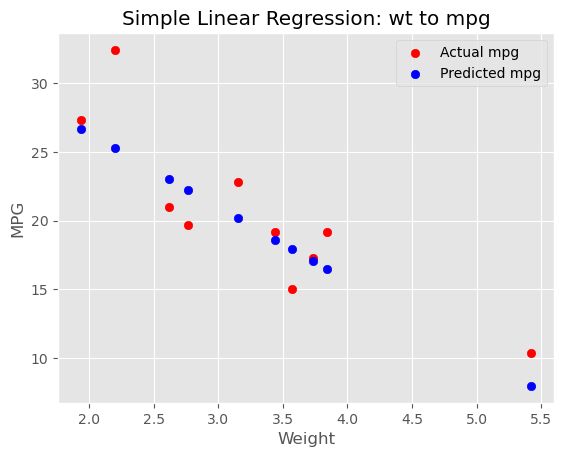

In [74]:
# Plot simple regression 
plt.scatter(val["wt"], val["mpg"], color='red', label='Actual mpg') 
plt.scatter(val["wt"], val_pred1, color='blue', label='Predicted mpg') 
plt.xlabel("Weight") 
plt.ylabel("MPG") 
plt.title("Simple Linear Regression: wt to mpg") 
plt.legend() 
plt.show()

## Multiple linear regression with automobile data

> **EXERCISE:** With sklearn, fit the training data using multiple linear regression with two predictors.  Use the model to make mpg predictions.

>How do these mean squared errors compare to those from the simple linear regression?

>Time permitting, repeat the training and testing with three predictors and calculate the mean squared errors.  How do these compare to the errors from the one and two predictor models?

Very close to 1!

Root Mean Squared Error

Measures the average squared difference between actual and predicted values.
Smaller is better.
Here, your model’s predictions are very close to the actual values.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load data
dfcars = pd.read_csv("mtcars.csv")
dfcars = dfcars.rename(columns={"Unnamed: 0": "name"})

# Split into train/validation
train, val = train_test_split(dfcars, test_size=0.3, random_state=42)

target = "mpg"

# Define predictor sets
predictors_1 = ["wt"]
predictors_2 = ["wt", "hp"]
predictors_3 = ["wt", "hp", "cyl"]


In [76]:
def evaluate(predictors, name):
    model = LinearRegression()
    model.fit(train[predictors], train[target])
    
    train_pred = model.predict(train[predictors])
    val_pred = model.predict(val[predictors])
    
    train_mse = mean_squared_error(train[target], train_pred)
    val_mse = mean_squared_error(val[target], val_pred)
    
    print(f"{name:20s} | Train MSE: {train_mse:.2f} | Val MSE: {val_mse:.2f}")
    return model

In [77]:
# Run models
evaluate(predictors_1, "Simple: wt")
evaluate(predictors_2, "Multiple: wt + hp")
evaluate(predictors_3, "Multiple: wt + hp + cyl")

Simple: wt           | Train MSE: 8.63 | Val MSE: 9.09
Multiple: wt + hp    | Train MSE: 6.20 | Val MSE: 6.36
Multiple: wt + hp + cyl | Train MSE: 5.62 | Val MSE: 5.59


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Diabetes Dataset

Now we are going to do similar with the diabetes dataset built into sklearn

In [78]:
from sklearn import datasets
diabetes = datasets.load_diabetes() # This loads the diabetes dataset, which is a classic regression dataset.
print(diabetes.DESCR) #  full dataset description

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


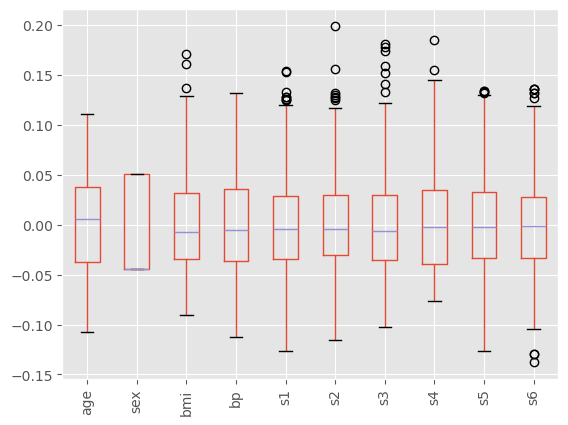

In [79]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) # diabetes.data → a NumPy array of shape (442, 10). diabetes.feature_names → the names of the 10 features
data.boxplot(rot=90) # the median of each feature. the spread (interquartile range). outliers. how each feature is scaled
# The rot=90 rotates the x‑axis labels so they don’t overlap.
data.head() # Display

Above I put the data into a pandas dataframe and then tried to visualise it. You will notice all of the data is in a similar range

### Normalised data
They all have a mean of 0 and standard deviation of 1. This is called Normalising the data and is a common step that I'll get into later on.

The obvious one you'll notice is the sex variable. This has two options which are 0.050680 or -0.044642, when usually with 2 options we would go with 0 and 1. The numbers were changed due to this normalisation

In the diabetes dataset, all features have already been normalized:
mean = 0
standard deviation = 1

#### Why normalize?
Because the original features (age, BMI, blood pressure, etc.) are on very different scales.
Normalization makes: 
1. coefficients easier to compare
2. the model more stable
3. training faster

In [80]:
X = data 
y = diabetes.target

Fitting the full model and interpreting coefficients

lr = LinearRegression()

In [82]:
lr.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [95]:
r_squared = lr.score(X,y) # This gives an R² ≈ 0.51, meaning: The model explains about 51% of the variation in disease progression.

Let's do a slightly different r2
This gives an $R^2 \approx 0.51$, meaning the model explains about 51\% of the variation in disease progression.

Then we compute the adjusted $R^2$, which penalizes models with many predictors:

$$
\text{Adjusted } R^2
= 1 - (1 - R^2)\frac{n - 1}{n - p - 1}
$$


In [84]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared # This is normal — adjusted R² is always ≤ R².

0.5065592904853231

In [85]:
lr.coef_ # Some coefficients were very large (e.g., 751, –792).

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

This happens because:
- the features are normalized
- some features are highly correlated
- the model is trying to compensate for multicollinearity
  
Large coefficients often signal instability.

In [86]:
lr.intercept_

np.float64(152.13348416289597)

Text(0, 0.5, 'Coefficient')

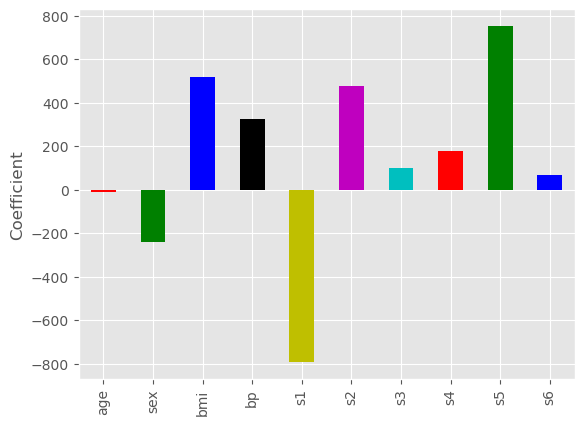

In [87]:
coef=pd.Series(lr.coef_ , index=diabetes.feature_names)
coef.plot(kind='bar', color = list('rgbkymc'))
plt.ylabel('Coefficient')

Some of those coefficients are very large, and it looks like age does not contribute as much as the others

The very large coefficients can often be problematic so we'll have to think about this one again later

Maybe removing age will give us a better model

We don't really have enough knowledge to figure it out, from past stuff I've done, you would get a better model without age, s3, s4 and s6. Maybe we'll look into that later

#### Dropping the “age” feature

In [88]:
X = data.drop(["age"], axis=1)

In [89]:
lr = LinearRegression()
lr.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
lr.score(X,y) # The R² stayed almost the same:

0.5177170179957553

In [91]:
r_squared = lr.score(X,y) 

r2 score is the same, but your lecturer said it should be better. Well R2 is not always the best, there is an adjusted r2

In [97]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared  # Adjusted R² improved slightly:

0.5076694558706669

Slightly better than the model with age included.

There are lots of other metrics that could be used, some could be better than others, typically we look at multiple ones to make our determination

Would Root Mean Squared Error be useful? Probably should use a validation set to do some model selection

---
## Summary - Lab2
### What Was Done
1. Generated the synthetic dataset
A dataset of 500 samples was created with three features of varying predictive strength and a target variable constructed from them.
2. Split the data
The dataset was divided into:
70% training data
30% validation data
using train_test_split.
3. Fitted multiple linear regression models
Four linear regression models were fitted using different subsets of features:
Model using x₁ only
Model using x₂ only
Model using x₁ + x₂
Model using x₁ + x₂ + x₃
4. Evaluated each model
For every model, the following metrics were computed:
Training R²
Validation R²
These metrics were used to compare how well each model fit the training data and how well it generalised to unseen data.

---

### What Was Observed
1. The x₁‑only model performed well because x₁ is the strongest predictor.
2. The x₂‑only model performed poorly on both training and validation sets.
3. The x₁ + x₂ model achieved the best validation performance, showing that adding a weak but informative feature improves generalisation.
4. The x₁ + x₂ + x₃ model had the highest training R² but slightly worse validation R², demonstrating overfitting caused by including a noise feature.

---

### Key Conclusions
- The model with the highest training performance is not necessarily the best model.
- Validation performance is the appropriate metric for selecting models.
- Adding irrelevant or noisy features can reduce generalisation, even if training performance improves.
- Comparing models based on validation performance is the essence of model selection.
